<h1> DS200A Computer Vision Assignment</h1>

In [229]:
from datainput import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.transform import resize

train_path = './20_categories_training/'
val_path = './20_Validation/'
# try not to printout train_data['Pictures'] directly, takes a while
train_data = read_train_data(train_path)
test_data = read_test_data(val_path)

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [159]:
class feature_extract:
    """class method for easy plotting and function call"""
    def __init__(self):
        self.names = {0:"image size",
                        1:"red-channel average",
                        2:"aspect ratio",
                        3:"green-channel average",
                        4:"blue-channel average",
                        11:"red-channel partitions",
                        12:"green-channel partitions",
                        13:"blue-channel partitions"}
        self.funcs = {0:feature_extract.ft0, 
                    1:feature_extract.ft1,
                    2:feature_extract.ft2,
                    3:feature_extract.ft3,
                    4:feature_extract.ft4,
                    11:feature_extract.ft11,
                    12:feature_extract.ft12,
                    13:feature_extract.ft13}
        self.labels = {0:"Airplanes", 1:"Bear", 2:"Blimp", 3:"Comet", 4:"Crab", 
           5:"Dog", 6:"Dolphin", 7:"Giraffe", 8:"Goat", 9:"Gorilla", 
           10:"Kangaroo", 11:"Killer-Whale", 12:"Leopards", 13:"Llama", 
           14:"Penguin", 15:"Porcupine", 16:"Teddy-Bear", 17:"Triceratops", 
           18:"Unicorn", 19:"Zebra"}
        
    ### resize images
    def resize_image(image, xsize = 400, ysize = 300):
        # resize to 4x3 images
        return resize(image, (ysize, xsize), anti_aliasing=True)
    
    ### scalar features
    @staticmethod
    def ft0(image):
        # Returns the pixel size of the image
        return image.size
    @staticmethod
    def ft1(image):
        # Returns the average of the red-channel pictures for the images
        return np.mean(image[:,:,0]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft2(image):
        #Returns the aspect ratio of the image
        return image.shape[1]/image.shape[0]
    @staticmethod
    def ft3(image):
        # green channel
        return np.mean(image[:,:,1]) if len(image.shape)==3 else np.mean(image)
    @staticmethod
    def ft4(image):
        # blue channel
        return np.mean(image[:,:,2]) if len(image.shape)==3 else np.mean(image)
    
    
    
    ### matrix features    
    @staticmethod
    def ft11(image):
        # find portion of red pixels in buckets
        return feature_extract.partition(image[:,:,0]) if len(image.shape)==3 else feature_extract.partition(image[:,:,0])
    @staticmethod
    def ft12(image):
        # find portion of green pixels in buckets
        return feature_extract.partition(image[:,:,1]) if len(image.shape)==3 else feature_extract.partition(image[:,:,1])
    @staticmethod
    def ft13(image):
        # find portion of blue pixels in buckets
        return feature_extract.partition(image[:,:,2]) if len(image.shape)==3 else feature_extract.partition(image[:,:,2])

    @staticmethod
    def partition(image_single_color, parts = 10):
        # partition O(nlogn), returns portion of pixels fall into each partition
        image = image_single_color.flatten()
        part_size = 255//parts
        n = len(image)
        res = []
        image.sort()
        count = 0
        i = 0
        current = part_size
        while i < n:
            if image[i] < current:
                count += 1
                i += 1
            else:
                current += part_size
                res = np.r_[res, count/n]
                count = 0
        # left-over pixels ignored to avoid colinearity
        return res


<h4> Graphs </h4>

 We expect all external sources sited, and significant indication of EDA. 

In [263]:
# findout shape of all images
y_sizes = train_data.Pictures.apply(lambda x: x.shape[0])
x_sizes = train_data.Pictures.apply(lambda x: x.shape[1])
pd.Series(x_sizes).describe(), pd.Series(y_sizes).describe()

(count    1501.000000
 mean      403.012658
 std       241.180901
 min       115.000000
 25%       250.000000
 50%       350.000000
 75%       498.000000
 max      3424.000000
 Name: Pictures, dtype: float64, count    1501.000000
 mean      340.008661
 std       213.734491
 min       105.000000
 25%       200.000000
 50%       300.000000
 75%       426.000000
 max      3225.000000
 Name: Pictures, dtype: float64)

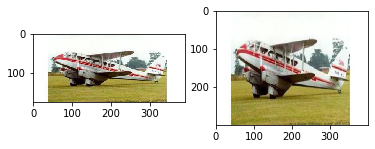

In [274]:
# example of resizing image
img = train_data.Pictures[50]
plt.subplot(1,2,1), plt.imshow(img)
img_resized = resize(img, (300, 400), anti_aliasing=True)
plt.subplot(1,2,2), plt.imshow(img_resized)
plt.show()

<h5> 1. Check Scalar Features </h5>

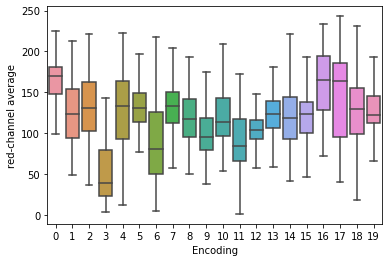

In [160]:
# visualize feature spread over different categories
# check if there is any meaningful difference
fe = feature_extract() # feature extract instance
choice = 1 # choose from 0-4
feature = train_data.Pictures.apply(fe.funcs[choice])
sns.boxplot(train_data.Encoding, feature, showfliers=False)
plt.ylabel(fe.names[choice])
plt.show()

<h5> 2. Check Matrix Features </h5>

In [211]:
train_data.iloc[[1,100,20]]

,Pictures,Encoding
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0
100,"[[[255, 252, 251], [255, 253, 255], [253, 254,...",1
20,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


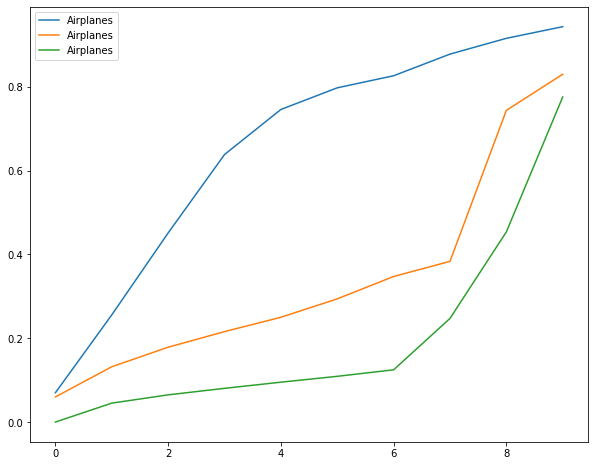

In [243]:
fe = feature_extract()
choice = 11 # choose from 11-13
plt.figure(figsize=(10,8))
for i in [1,2,3]:
    temp = fe.funcs[choice](train_data.iloc[i,0])
    plt.plot(np.cumsum(temp), label = fe.labels[train_data.iloc[i,1]])
plt.legend()
plt.show()

<h4> Sources </h4>

<h5> Referenced: </h5>

1. Canny Edge Detection, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html 

2. Oriented FAST and Rotated BRIEF, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb


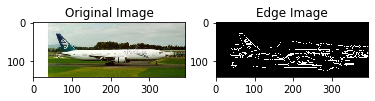

In [230]:
# Canny edge detection
img = train_data.iloc[4,0]
edges = cv2.Canny(img, 50, 250)

plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.show()

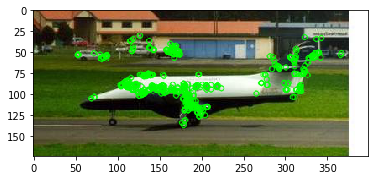

(<matplotlib.image.AxesImage at 0x1c609381d0>, None)

In [269]:
img = train_data.iloc[1,0]

# Initiate STAR detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, np.array([]), color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

In [199]:
des.shape, img.shape, len(kp)

((418, 32), (174, 399, 3), 418)

In [200]:
for i in range(0,400,40):
    kp_pt = kp[i]
    print(kp_pt.response, kp_pt.pt, kp_pt.class_id, kp_pt.size)

0.001149150775745511 (340.0, 52.0) -1 31.0
0.0026778022293001413 (133.0, 79.0) -1 31.0
0.0005867213476449251 (193.0, 92.0) -1 31.0
0.0008931057527661324 (114.00000762939453, 87.60000610351562) -1 37.20000076293945
0.0012116985162720084 (194.40000915527344, 115.20000457763672) -1 37.20000076293945
0.001142311142757535 (180.0, 113.76000213623047) -1 44.6400032043457
0.0006281562382355332 (171.36000061035156, 53.28000259399414) -1 44.6400032043457
0.0009544319473206997 (316.2240295410156, 96.76800537109375) -1 53.5680046081543
0.0003295625501777977 (326.592041015625, 77.760009765625) -1 53.5680046081543
0.00012011459330096841 (302.7456359863281, 89.16481018066406) -1 64.28160858154297


<h4> DataFrame Creation </h4>

In [2]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [75]:
# feature_frame(train_data)